In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape,Conv2D, MaxPool2D,Flatten,Dense, Dropout, Rescaling
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.utils import img_to_array

2024-10-29 03:38:48.988234: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 03:38:48.992981: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 03:38:49.005260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730162329.025840  201507 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730162329.031136  201507 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 03:38:49.052573: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [7]:
#Load the dataset

train_df = pd.read_csv('raw_data/sign_mnist_train.csv')
test_df = pd.read_csv('raw_data/sign_mnist_test.csv')

In [9]:
train_df['label'].value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

In [10]:
#create X,y - test and train sets
X_train=train_df.drop(columns = 'label')
X_test = test_df.drop(columns = 'label')

y_train = train_df.label
y_test = test_df.label

#X to numpy and apply reshape from 784 columns to (28,28,1)
numpy_X_train = X_train.to_numpy()
numpy_X_test = X_test.to_numpy()

X_train_shaped = np.apply_along_axis(lambda x:np.reshape(x,(28,28,1)),1,numpy_X_train)
X_test_shaped = np.apply_along_axis(lambda x:np.reshape(x,(28,28,1)),1,numpy_X_test)

# encode y
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [24]:
X_train_shaped.shape

(27455, 28, 28, 1)

In [7]:
#Augmentation (borrowed) NOT USED ATM

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train_shaped)

In [23]:
#model initiation


model = Sequential()

model.add(Rescaling(scale = 1./255.,input_shape = (28,28,1)))

model.add(Conv2D(16,(4,4),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(2,2),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(50,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(25,activation = 'softmax'))

/home/diana/.pyenv/versions/3.10.6/envs/sign_language_interpreter/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# model compilation
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [25]:
# model fitting using augmented dataset

es = EarlyStopping(patience = 3, restore_best_weights=True)


model.fit(X_train_shaped,y_train_cat,batch_size =128,validation_split=0.3,epochs = 100, callbacks=es)

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0427 - loss: 3.2132 - val_accuracy: 0.1747 - val_loss: 3.0434
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.1558 - loss: 2.7928 - val_accuracy: 0.6392 - val_loss: 1.5821
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.3955 - loss: 1.8685 - val_accuracy: 0.7571 - val_loss: 0.9844
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.5145 - loss: 1.4359 - val_accuracy: 0.8512 - val_loss: 0.6371
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5998 - loss: 1.1652 - val_accuracy: 0.8844 - val_loss: 0.5152
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6502 - loss: 1.0045 - val_accuracy: 0.8995 - val_loss: 0.4174
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6867 - loss: 0.8930 - val_accuracy: 0.9245 - val_loss: 0.3700
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.7059 - loss: 0.8489 - 

In [26]:
#saving model (no changes at this point)

save_model(model,'MNIST_basic_one.keras')

In [4]:
#loading for evaluation&prediction

loaded_model = load_model('MNIST_basic_one.keras')

ValueError: File not found: filepath=basic_models/MNIST_basic_one.keras. Please ensure the file is an accessible `.keras` zip file.

In [28]:
loaded_model.evaluate(X_test_shaped,y_test_cat)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9619 - loss: 0.1049


[0.09751017391681671, 0.9651421904563904]

In [18]:
# reshaping the image from net for prediction
from matplotlib import pyplot as plt

from PIL import Image
img = Image.open('w.jpg')
img = img.resize((28,28))
img = img_to_array(img)
img = img.reshape((-1,28,28,1))

In [26]:
# using one of the images from test set to see that it works (as opposed to one from net)

check = X_test_shaped[7].reshape((-1,28,28,1))

In [29]:
#prediction using image from net
res = loaded_model.predict(img)[0].round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [21]:
#note that there are no images for j in dataset but it is still included there

alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
len(alphabet)

25

In [30]:
#show the prediction

prediction = pd.DataFrame(res,index=alphabet,columns =['weight'])
prediction.sort_values(by = 'weight',ascending = False)

,weight
h,0.54
g,0.27
l,0.14
p,0.02
t,0.01
r,0.01
x,0.01
b,0.00
a,0.00
i,0.00


In [12]:
#just to see the images in the dataset as they are

check = np.reshape(X_train.iloc[7],(28,28,1))

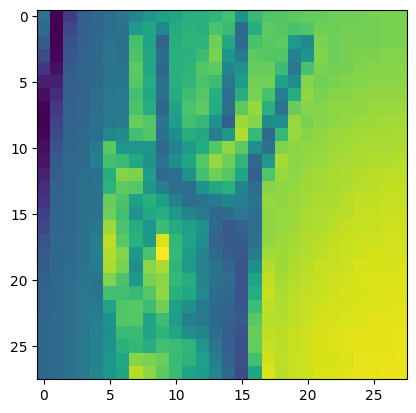

In [13]:
from matplotlib import pyplot as plt

plt.imshow(check)